In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import nltk

In [7]:
df = pd.read_csv(r"C:\Users\eren\Desktop\yeni veriler\data\stemmed_sentences.csv", header=None, names=["metin"])


     


     

In [9]:
df

,metin
0,oliv jame cook oliv jame cook prefac prefac pr...
1,fi rst play game fourteen continu come back fr...
2,reason chose write game silent hill f avourit ...
3,lot content document cours prior knowl ge game...
4,two main compel object develop allow bleed doc...
...,...
1002,start level player spend adventur rememb true ...
1003,player start blank slate equival third level c...
1004,player level possibl ad charact class previou ...
1005,rememb abil pertain class cours adventur


In [11]:
def zipf_analysis(text_column, num_words=50):
    # Geçersiz ve boş değerleri temizle
    cleaned_texts = text_column.dropna().astype(str)

    if cleaned_texts.empty:
        print("Uyarı: Metin verisi boş. Analiz yapılamaz.")
        return

    # Metinleri birleştir ve temizle
    text = ' '.join(cleaned_texts).lower()
    text = re.sub(r'[^\w\s]', '', text)

    # Tokenizasyon
    tokens = nltk.word_tokenize(text)
    tokens = [token for token in tokens if token.isalpha()]

    if not tokens:
        print("Uyarı: Temizleme sonrası analiz yapılacak kelime kalmadı.")
        return

    # Kelime sıklığı
    word_counts = Counter(tokens)
    most_common_words = word_counts.most_common(num_words)

    # Sıra ve sıklık verileri
    ranks = np.arange(1, len(most_common_words) + 1)
    frequencies = [count for word, count in most_common_words]

    # Grafik
    plt.figure(figsize=(10, 6))
    plt.loglog(ranks, frequencies, marker='o')
    plt.xlabel('Kelime Sırası (log)')
    plt.ylabel('Kelime Sıklığı (log)')
    plt.title('Zipf Yasası Analizi (stemmed_sentences)')
    plt.grid(True)
    plt.show()

    # Bilgi çıktısı
    print(f"Toplam kelime sayısı: {len(tokens)}")
    print(f"Farklı kelime sayısı: {len(word_counts)}")

    if len(tokens) < 10000:
        print("Veri seti küçük. Zipf analizi sınırlı genellenebilir.")
    else:
        print("Veri seti yeterli büyüklükte.")


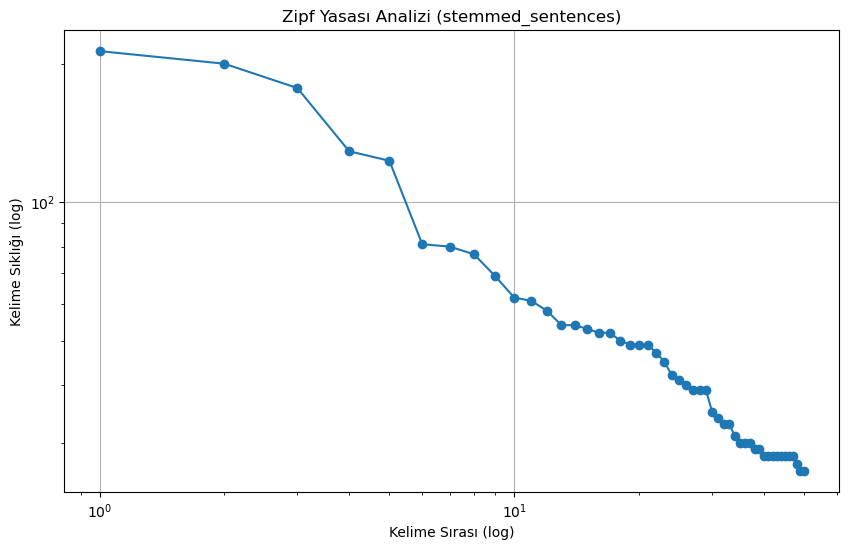

Toplam kelime sayısı: 11959
Farklı kelime sayısı: 3104
Veri seti yeterli büyüklükte.


In [17]:
df = pd.read_csv(r"C:/Users/eren/Desktop/yeni veriler/data/stemmed_sentences.csv", header=None, names=["metin"])
zipf_analysis(df["metin"])
